# Real Estate Solution (Regression Models)

## 1) Data Preparation

In [1]:
from src import dataPrep

from src import createLinReg
from src import createDTree
from src import createRdmFrst
from src import evalModel
from src import modelSaveLoad

Preprocessing/Data Prep

The following function creates train and test data along with a list of features. 

You can also see the first and last 5 rows of the original dataset and the shape of the train and test datasets.

In [2]:
x_train, x_test, y_train, y_test, features = dataPrep.createTrainTest(r"data\final_2.csv", target='price', stratifyBy='property_type_Bunglow',print_vals=True)

Head:
    price  year_sold  property_tax  insurance  beds  baths  sqft  year_built  \
0  295850       2013           234         81     1      1   584        2013   
1  216500       2006           169         51     1      1   612        1965   
2  279900       2012           216         74     1      1   615        1963   
3  379900       2005           265         92     1      1   618        2000   
4  340000       2002            88         30     1      1   634        1992   

   lot_size  basement  popular  recession  property_age  \
0         0         0        0          1             0   
1         0         0        0          0            41   
2         0         0        0          1            49   
3     33541         1        0          0             5   
4         0         0        0          0            10   

   property_type_Bunglow  property_type_Condo  
0                      0                    1  
1                      0                    1  
2             

The following function scales the train and test inputs using MinMaxScaler

In [3]:
xtrain_scaled, xtest_scaled = dataPrep.scaleData(x_train, x_test)

## 2) Linear Regression Model

First, a linear regression model will be created and tested using the train and test datasets. 

The function below will return the model, results (predictions) from the train data, and results from the test data.

You can also see the model coefficients, intercept, and number of coefficients.

In [4]:
lr_model, lr_train_pred, lr_test_pred = createLinReg.createLinReg(xtrain_scaled, xtest_scaled, y_train, print_vals= True)

Model Coefficients:
[ 284780.28472304 -152614.94144949 1062105.68299652   22097.26766429
   -9134.48409815  111080.95129568   86404.25585759   67851.21562657
    8175.54818901    3494.60949825  -51231.60772801  -44107.2257569
    8175.548189     -8175.54818901]


Model Intercept:
4453.78833396011


Number of Coefficients:
14


The Mean Absolute Errors for the train and test data are calculated below using evaluateModel.

In [5]:
evalModel.evaluateModel(lr_train_pred, y_train, lr_test_pred, y_test, "MAE", print_vals=True)

Train error is 82443.0020368209
Test error is 92308.78999679159


In [10]:
evalModel.evaluateModel(lr_train_pred, y_train, lr_test_pred, y_test, "r2", print_vals=True)

Train R-squared score: 0.5157441770685608
Test R-squared score: 0.16955059931963967


In [11]:
evalModel.evaluateModel(lr_train_pred, y_train, lr_test_pred, y_test, "rmse", print_vals=True)

Train Root Mean Squared Error (RMSE): 104966.01597490953
Test Root Mean Squared Error (RMSE): 141725.27215847574


These values are not very good. Maybe a different model could be used.

## 3) Decision Tree Model

This decision tree model below was created using the following function and the train and test data. The results are also outputted.

Also notice the generated tree plot.

Tree Plot


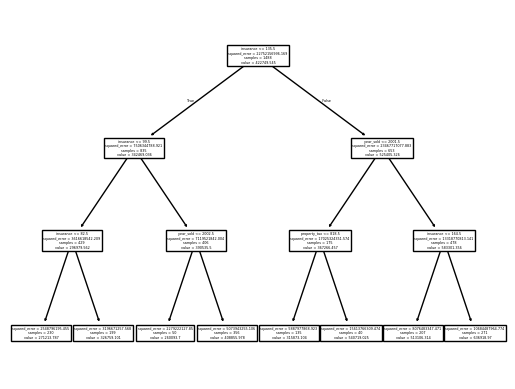

In [28]:
dt_model, dt_train_pred, dt_test_pred = createDTree.createDTree(x_train, y_train, x_test, features, plot_tree=True)

In [8]:
evalModel.evaluateModel(dt_train_pred, y_train, dt_test_pred, y_test, "mae", print_vals=True)

Train error is 59334.41211435451
Test error is 68791.12525572484


In [12]:
evalModel.evaluateModel(dt_train_pred, y_train, dt_test_pred, y_test, "r2", print_vals=True)

Train R-squared score: 0.7303398303666825
Test R-squared score: 0.6639073693415143


In [13]:
evalModel.evaluateModel(dt_train_pred, y_train, dt_test_pred, y_test, "rmse", print_vals=True)

Train Root Mean Squared Error (RMSE): 78328.47831479121
Test Root Mean Squared Error (RMSE): 90161.30864574105


These values are better than those of the linear regression model, so this one has become the better choice.

## 4) Random Forest Model

The function below creates a random forest model from the data with some specified parameters/hyperparameters being set.

See the feature importances following it.

In [14]:
rf_model, rf_train_pred, rf_test_pred = createRdmFrst.createRdmFrst(x_train, x_test, y_train, n_est = 200, max_d = 2, max_feat = 10, crit='absolute_error', feat_imp = True)

Feature Importances:
[1.88191720e-01 1.83045818e-01 5.93255252e-01 0.00000000e+00
 0.00000000e+00 2.82416699e-02 1.27520622e-03 5.46676165e-03
 2.20431167e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.03141305e-04 0.00000000e+00]


In [30]:
evalModel.evaluateModel(rf_train_pred, y_train, rf_test_pred, y_test, "mae", print_vals=True)

Train error is 70319.3981014785
Test error is 70555.9864045699


In [15]:
evalModel.evaluateModel(rf_train_pred, y_train, rf_test_pred, y_test, "r2", print_vals=True)

Train R-squared score: 0.6494430842876426
Test R-squared score: 0.6179228860051826


In [16]:
evalModel.evaluateModel(rf_train_pred, y_train, rf_test_pred, y_test, "rmse", print_vals=True)

Train Root Mean Squared Error (RMSE): 89308.03985297304
Test Root Mean Squared Error (RMSE): 96131.61179558639


The error values are in between those of the other two models. The cost due to model complexity would not justify using this model, either.

## 5) Pickle:

* modelSaveLoad uses pickle to save and load the models which were created using this notebook and modules
* The default pickleAction is 'save'
* We are going to be using the decision tree model

In [17]:
modelSaveLoad.pickleModel(r"models\lr_RE_Model.pkl",'wb', lr_model)
modelSaveLoad.pickleModel(r"models\dt_RE_Model.pkl",'wb', dt_model)
modelSaveLoad.pickleModel(r"models\rf_RE_Model.pkl",'wb', rf_model)

In [18]:
RE_Model = modelSaveLoad.pickleModel(r"models\dt_RE_Model.pkl", 'rb', pickleAction='load')

These are the feature importances of the Decision tree model:

In [19]:
RE_Model.feature_importances_

array([0.28103656, 0.06309214, 0.6558713 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Note that most of the importances are 0. This may be an issue.

## 6) Predictions

Use the pickle model to make predictions

In [20]:
RE_Prediction = modelSaveLoad.predict(RE_Model,[2025, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0, 1])

[271213.78695652]


d:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


You can also make predictions directly from the model:

In [21]:
RE_Model.predict([[2025, 139, 42, 1, 1, 703, 1992, 0, 0, 0, 0, 13, 0, 1]])

d:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([271213.78695652])

Note that the prediction results are the same. Maybe we need to visualize the predicted vs. actual values.

In [22]:
from matplotlib.pyplot import subplots, show

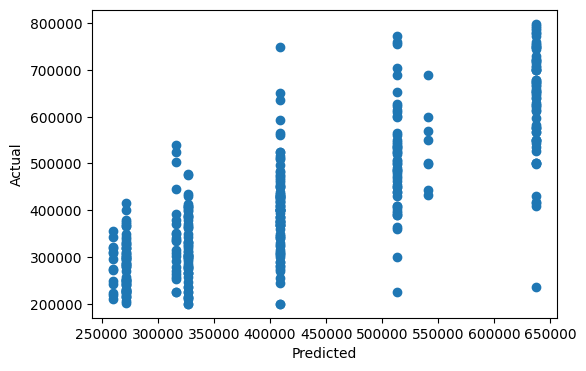

In [23]:
fig, ax = subplots(figsize=(6, 4))
ax.scatter(dt_test_pred, y_test)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
show()

The decision tree model determined the values using branching, making the target like a polynominal categorical variable.